_Arman Rezaei - 9723034_

In [1]:
set.seed(9723034)
m <- 1000

Assume $i = 5$. We would like to calculate the integral

$$
\int_{0}^{i}{ e^{-e^{x^2}} dx}.
$$

We will be using the simple monte carlo integration method.

**Algorithm**

1. Generate $X_1, \ldots, X_m$ iid from $\text{Unifrom}(a, b)$
2. Compute $\overline{g(X)} = \frac{1}{m}\sum_{i=1}^{m}{g(X_i)}$
3. $\hat{\theta} = (b-a)\overline{g(X)}$

## Part A - Calculating the Estimate

In [2]:
# step 1
a <- 0
b <- 5
X <- runif(m, min = a, max = b)

# step 2
g <- exp(-exp(X^2))
g.bar <- mean(g)

theta.hat <- (b - a) * g.bar
theta.hat

[1] 0.2214768

## Part B - Variance Reduction

There are multiple ways to reduce the variance, hence increasing the precision of the estimation. We will be taking a look at two of them; namely,
_Antithetic Variables_ and _Importance Sampling_.

### Antithetic Variables

First, we need to check if $g(X)$ is monotone. We can verify this by plotting it.

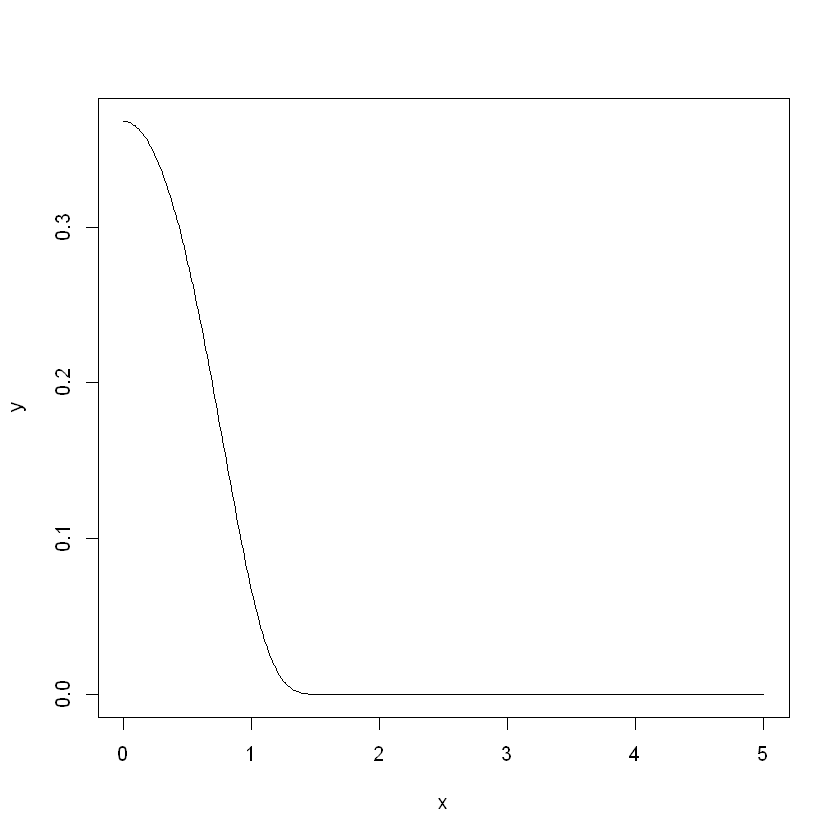

In [3]:
x <- seq(a, b, 0.01)
y = exp(-exp(x^2))
plot(x, y, type = "l")

It appears that it is monotone. Here is the algorithm:

**Algorithm**

1. Generate $m/2$ random variates from $\text{Uniform}(a, b)$, namely $u_1, \ldots, u_{m/2}$.
2. Set the rest of the $u_{m/2 + 1}, \ldots , u_m$ to $1 - u_i$.
3. Calculate $\hat{\theta}$ same as before.

In [4]:
a <- 0
b <- 5
U <- runif(m/2, min = a, max = b)
U <- c(U, 1-U)


g <- exp(-exp(U^2))
g.bar <- mean(g)

theta.hat2 <- (b - a) * g.bar
theta.hat2

[1] 0.4048593

## Part C - Calculating Increased Precision

If $\hat{\theta}_1$ and $\hat{\theta}_2$ are estimators of the parameter $\theta$, and $Var(\hat{\theta}_2) < Var(\hat{\theta}_1)$,
then the percent reduction in variance achieved by using $\hat{\theta}_2$ instead of $\hat{\theta}_1$ is
$$
100 \left( \frac{Var(\hat{\theta}_1) - Var(\hat{\theta}_2)}{Var(\hat{\theta}_1)} \right).
$$

In [5]:
# function for repeating the experiments a bunch of times
theta.est <- function(m, antithetic = FALSE) {
    a <- 0
    b <- 5
    
    U <- runif(m/2, min = a, max = b)
    if (antithetic == TRUE) { U <- c(U, 1-U) }
    else { U <- c(U, runif(m/2, min = a, max = b)) }

    g <- exp(-exp(U^2))
    g.bar <- mean(g)

    theta.hat <- (b - a) * g.bar
    return(theta.hat)
}

m <- 1000
est1 <- est2 <- numeric(10)
for (i in 1:10) {
    est1[i] <- theta.est(m)
    est2[i] <- theta.est(m, antithetic = TRUE)
}

# variance reduction
(var(est1) - var(est2)) / var(est1)

[1] -0.3752202